## Final Project Submission

Please fill out:
* Student name: Niko Ganev
* Student pace: Part Time
* Scheduled project review date/time: 01/30, 8pm ET
* Instructor name: Eli Thomas
* Blog post URL:


# Obtaining Data

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('kc_house_data.csv')
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [18]:
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,...,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.0,3,2.00,1490,1126,3.0,0.0,0.0,...,8,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,0.0,NaN,...,9,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,0.0,0.0,...,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [19]:
#since Price is our main interest lets analyze it first
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 4.023365
Kurtosis: 34.541359


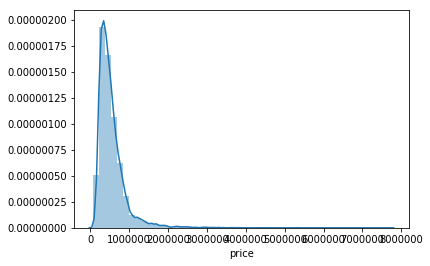

In [20]:
sns.distplot(df.price)
print("Skewness: %f" % df.price.skew())
print("Kurtosis: %f" % df.price.kurt())

We notice price is leptokurtic and positively skewed lets normalize it thourgh log transformation and  scale it to facilitate modelling. 

In [21]:
mean_house_price = df.price.mean()#will be used later
df["price"] = np.log(df["price"])
m=df.price.mean()
std=df.price.std()
df.price = (df.price - m) / std

Let's give it another run :

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


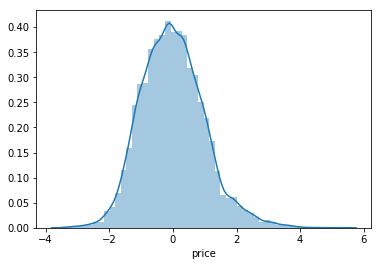

In [22]:
sns.distplot(df.price)

No more skewness or kurtosis! Beautiful! We can move on

# Cleaning the Data

In [23]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Dropping columns we wont use 

In [24]:
df = df.drop('id', 1) # information is just a name, not meaningful

Dealing with nulls

In [25]:
df.isna().sum() # checking for Nulls

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [26]:
#Rows with NaN value in the view colomn can be dropped 
#----------------------------------------------------------------------------------------------------------
df.dropna(subset=['view'],inplace=True)

In [27]:
#Checking Values on Waterfront and yr_renovated column
#----------------------------------------------------------------------------------------------------------
print(df.waterfront.value_counts())


0.0    19019
1.0      145
Name: waterfront, dtype: int64


In [28]:
df['waterfront'] = df['waterfront'].fillna(0)#we assume that if there is no data it is not a waterfront property


I tried filling with 1 instead of 0 after the model was ready, rerunning the model with the new waterfront data had no effect on the R-Squared

(1920, 2018)

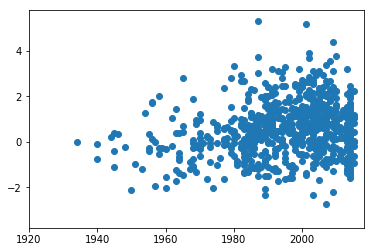

In [29]:
plt.scatter(df.yr_renovated, df.price)
plt.xlim(1920,2018)

In [30]:
#The year of renovation doesnt seem to have much impact on price. We notice that some houses last renovated in the 1930s 
#and 1940s are worth more than other house renovated around 2015. We will drop the column.
df = df.drop('yr_renovated', 1)

In [31]:
df.info()#next step is make sure all columns are formated in teh right type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(7), int64(10), object(2)
memory usage: 3.3+ MB


In [32]:
df.condition.value_counts()#counldn't see the condition column values with df.head, 
#lets have a look at the value of the categorical variables

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [33]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [34]:
df.bathrooms.value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [35]:
df.floors.value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [36]:
df.bedrooms.value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [37]:
#Dropping the outlier, it is triple the number of rooms od the closest value
df = df[df.bedrooms != 33]

In [38]:
df.grade.value_counts()

7     8947
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [39]:
#Date - lets remove the day and keep month and year so we can use binning later
#----------------------------------------------------------------------------------------------------------
df.date=pd.to_datetime(df.date, format="%m/%d/%Y");
df.date=df.date.astype(str)
df.date=df.date.map(lambda x: x[:7])

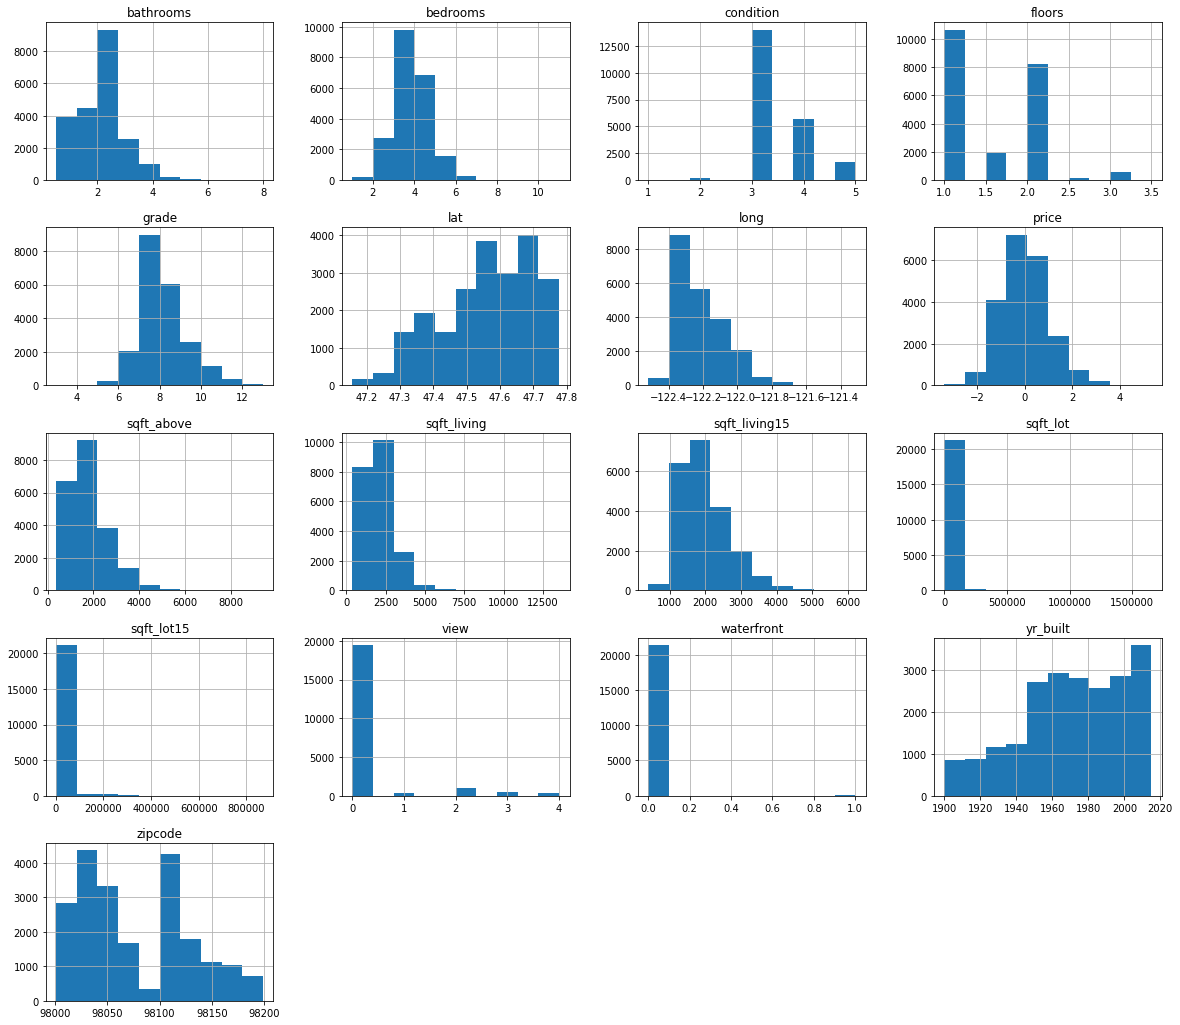

In [40]:
df.hist(figsize = (20,18));

A lot of categorical variables: zipcode, waterfront, view, grade, floors, condition, bedrooms, bathrooms. Grade looks normally distributed but as we will see shortly it is highly correlated with other variables and treating it as categorical instead of eliminating it improves the model

The numerical data present high levels of skewness and kurtosis and most likely heteroskedasticty for variables like sqft_lot and sqft_lot15.

In [41]:
df.zipcode.describe()

count    21533.000000
mean     98077.938188
std         53.507609
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

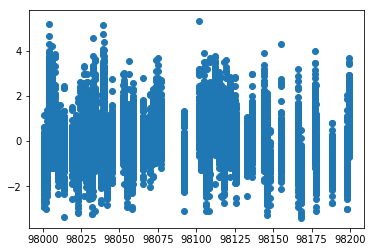

In [42]:
plt.scatter(df.zipcode,df.price)

In [43]:
df['zipcode']=df['zipcode'].astype('category')#zipcode seems to have a significant effect on price, lets retain it as categorical and we will use binning

Let's just check that it makes sense geographically by plotting the longitudes and latitutes which should result in a map of the properties.

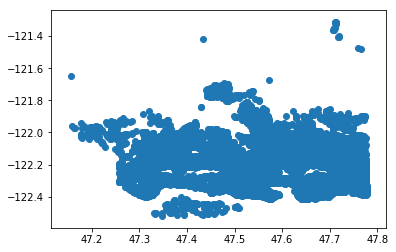

In [44]:
plt.scatter(df.lat, df.long)

In [45]:
#The houses in the data set are all located next to each other, very little outliers, we can then assume that using 
#the zipcodes for location will be meaningful enough, let's now drop latitude and longitude columns
df = df.drop('lat', 1)# will use zipcode for geographical data
df = df.drop('long', 1)#will use zipcode for geographical data

In [46]:
df.info()#lets see how it looks on the types side

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21533 entries, 0 to 21596
Data columns (total 17 columns):
date             21533 non-null object
price            21533 non-null float64
bedrooms         21533 non-null int64
bathrooms        21533 non-null float64
sqft_living      21533 non-null int64
sqft_lot         21533 non-null int64
floors           21533 non-null float64
waterfront       21533 non-null float64
view             21533 non-null float64
condition        21533 non-null int64
grade            21533 non-null int64
sqft_above       21533 non-null int64
sqft_basement    21533 non-null object
yr_built         21533 non-null int64
zipcode          21533 non-null category
sqft_living15    21533 non-null int64
sqft_lot15       21533 non-null int64
dtypes: category(1), float64(5), int64(9), object(2)
memory usage: 2.8+ MB


Many variables we wanted to treat as categorical are in integer or float type, this is easy to correct and will be done in the next section
On the numerical side not too many issues besides the sqft_basement that is probably going to be a little more complicated to handle.
For now lets just convert sqft_basement to float and set a temporary dataframe of numerical variables to have a glance at the key metrics.

In [47]:
# dealing with sqft_basement column
df['sqft_basement']=df['sqft_basement'].astype(str)
df.sqft_basement.replace('?', 0, inplace = True)
df.sqft_basement.apply(pd.to_numeric);
df['sqft_basement']=df['sqft_basement'].astype(float)


In [48]:
df_numerical=pd.concat([df.sqft_living,
       df.sqft_living15,df.sqft_lot,df.sqft_lot15,df.yr_built,df.sqft_basement,df.sqft_above], axis=1)


In [49]:
df_numerical.describe()#checking the numerical data

,sqft_living,sqft_living15,sqft_lot,sqft_lot15,yr_built,sqft_basement,sqft_above
count,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000
mean,2079.849208,1986.330423,1.509102e+04,12751.453397,1971.003390,285.230623,1788.592300
std,917.462472,685.122310,4.138112e+04,27256.060980,29.376271,439.339704,827.749142
min,370.000000,399.000000,5.200000e+02,651.000000,1900.000000,0.000000,370.000000
25%,1430.000000,1490.000000,5.040000e+03,5100.000000,1951.000000,0.000000,1190.000000
50%,1910.000000,1840.000000,7.617000e+03,7620.000000,1975.000000,0.000000,1560.000000
75%,2550.000000,2360.000000,1.068800e+04,10083.000000,1997.000000,550.000000,2210.000000
max,13540.000000,6210.000000,1.651359e+06,871200.000000,2015.000000,4820.000000,9410.000000


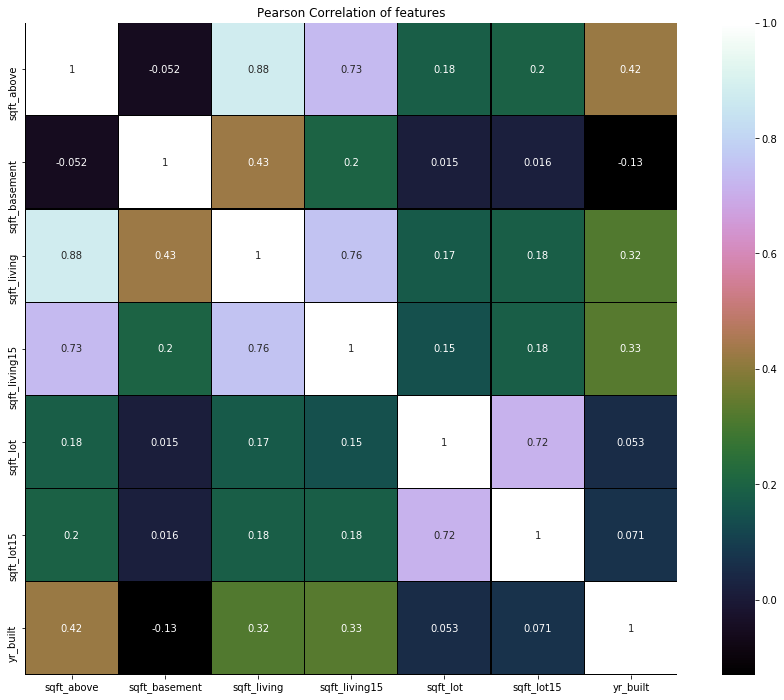

In [50]:
#Checking for Multicollinearity and plotting a correlation matrix
#----------------------------------------------------------------------------------------------------------
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_numerical.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = df_numerical[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

We notice high correlation between sqft_living, sqft_living15 and sqft_above. we will only retain one of them. Note : Grade was on that list as well if kept as numerical.

# Preparing Categorical Data

Converting to categorical

In [51]:
df.floors = df.floors.astype('category')
#df.yr_built = df.yr_built.astype(float)
df.zipcode = df.zipcode.astype('category')
df.condition = df.condition.astype('category')
df.view = df.view.astype('category')
df.date = df.date.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.grade = df.grade.astype('category')
df.bathrooms = df.bathrooms.astype('category')
df['waterfront']=df['waterfront'].astype(str).astype('category')#2 categories
df['date']=df['date'].astype('category')

Plotting Categorical Variables with box plots

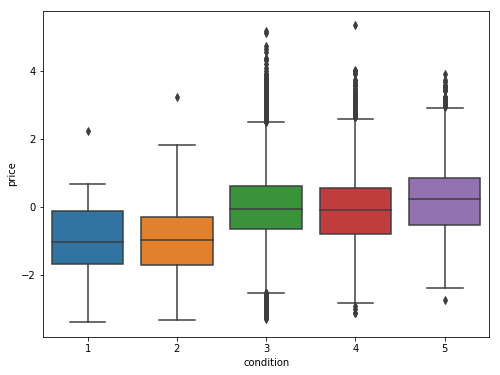

In [52]:
#Condition
#----------------------------------------------------------------------------------------------------------
var = 'condition'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)


Relationsip between condition and price is unclear. It does appear like price steps up for condition of three and above, we will exclude the variable for the moment.

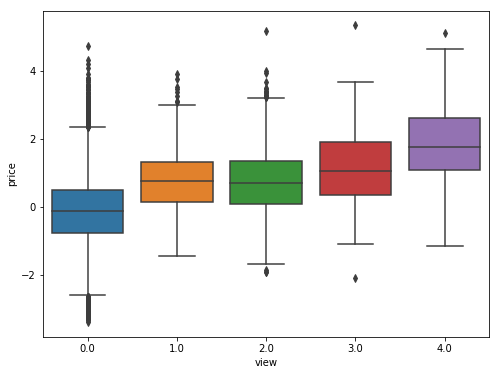

In [53]:
#view
#----------------------------------------------------------------------------------------------------------
var = 'view'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)


More views seems to indicate higher price

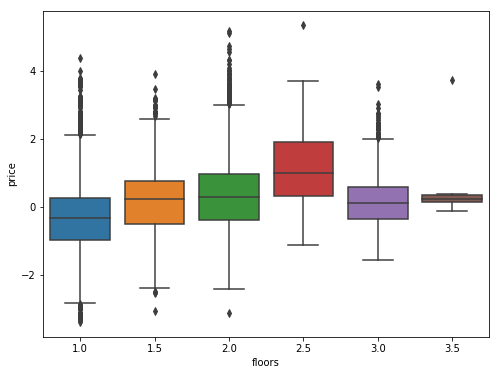

In [54]:
#floors
#----------------------------------------------------------------------------------------
var = 'floors'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)

Most price appreciation is acchieved at 2.5 floots over which houses seem to be less valuable, this is probably linked to location of the properties.

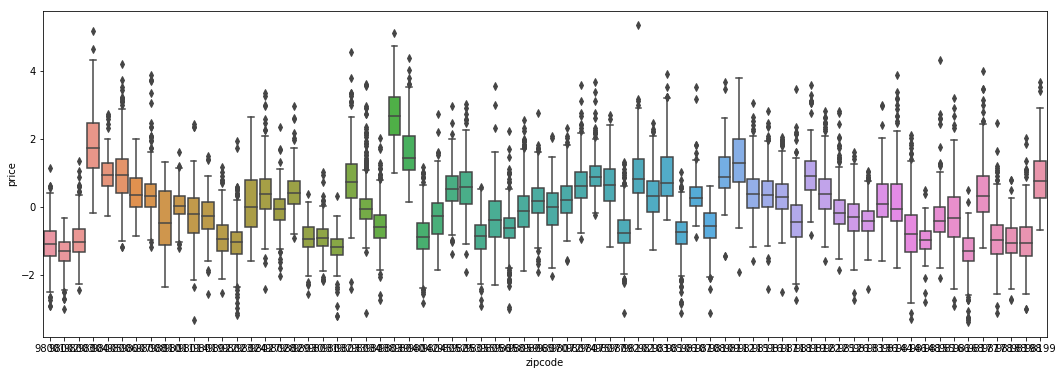

In [55]:
#zipcode
#------------------------------------------------------------------------------------------------
var = 'zipcode'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)

Based on this box plot, zip code appears to be one of the strongest candidates so far as a driver of price, which was expected. Some zipcodes have significantly higher price based on the quartiles of prices.

Note:I initially separated zipcode into bins by quartiles but the model returned an R-squared of only 0.65 whereas using each zipcode as a dummie variable allowed us to have a model with an R-Squared of 0.79 confirming that zipcode and thus location is ont of the most important independent variable to determine price.

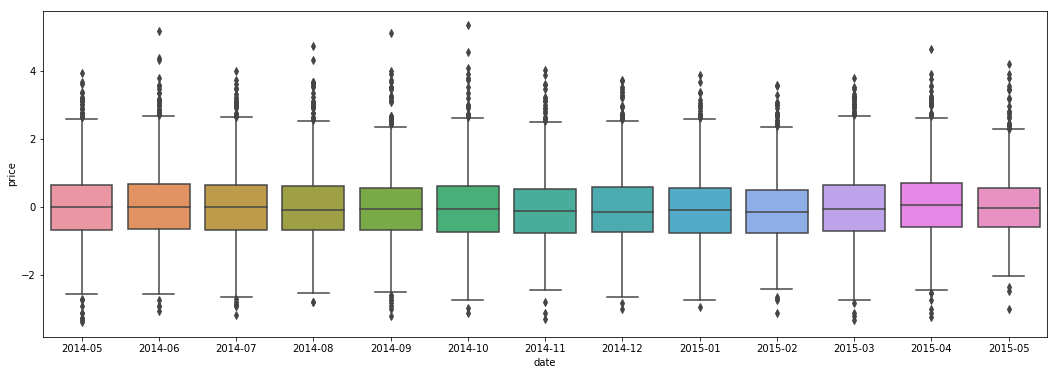

In [56]:
#date
#----------------------------------------------------------------------------------------------
var = 'date'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)


I would have expected to see higher prices for most recent transactions but no indications of this trend on this boxplot. The period of time over which the data was collected is too short for the trend of inflation in price to appear. One year not being a long enough period to show progressively increasing price or to demonstrate seaonality this variable could be excluded.

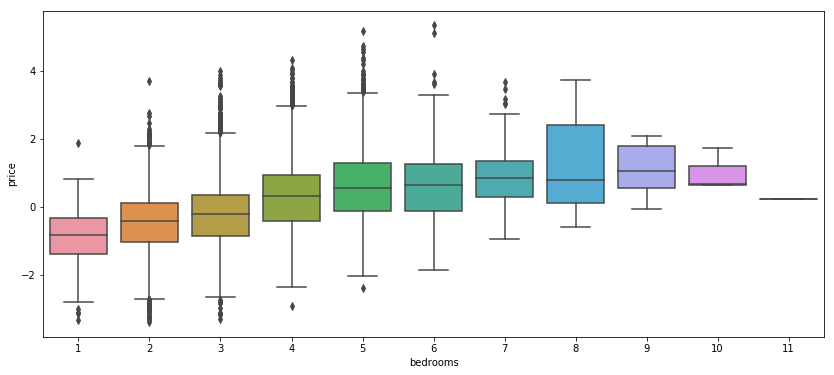

In [57]:
#bedrooms
#----------------------------------------------------------------------------------------------
var = 'bedrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)

The number of bedrooms does show an expected effect on price.

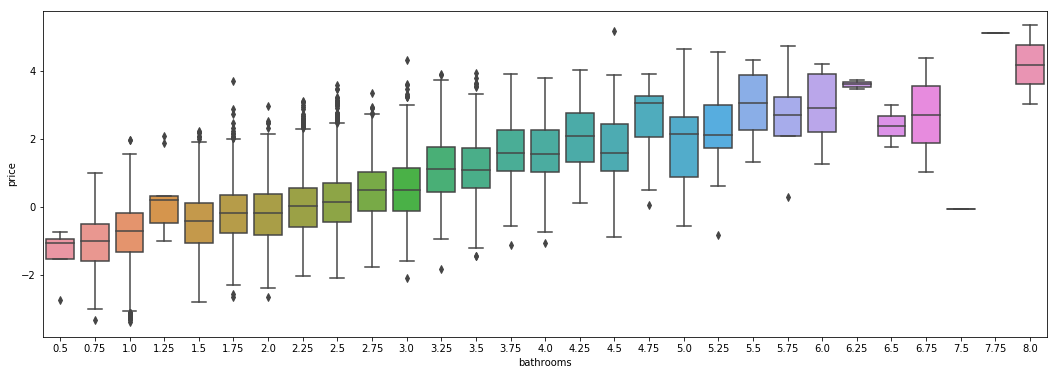

In [58]:
#bathrooms
#----------------------------------------------------------------------------------------------
var = 'bathrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)

Number of bathrooms exhibits an expected effect on price, maybe a top driver of the price? Early to say

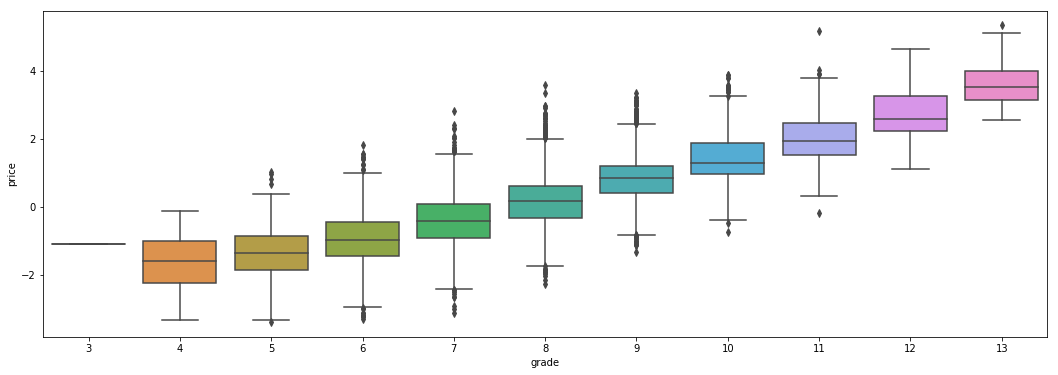

In [59]:
#grade
#----------------------------------------------------------------------------------------------
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)

Grade shows a strong relationsship to price as well, probably a good choice to have kept it as categorical rather than dismissing it due to multicolinearity or dismissing another variable that could potentially have a strong impact on price.

In [60]:
#Creating the Dummy Variables
#---------------------------------------------------------------------------------------------------
#date_dummies = pd.get_dummies(df.date, prefix="date")
cond_dummies=pd.get_dummies(df.condition, prefix='cond')
view_dummies=pd.get_dummies(df.view, prefix='view')
floors_dummies=pd.get_dummies(df.floors, prefix='floor')
zipcode_dummies=pd.get_dummies(df.zipcode, prefix='zip')
grade_dummies=pd.get_dummies(df.grade, prefix='grade')
bed_dummies=pd.get_dummies(df.bedrooms, prefix='bed')
bath_dummies=pd.get_dummies(df.bathrooms, prefix='bath')

In [61]:
#Taking out one dummy per category before modelling 
#we dropped the one with the least values since we have already looked at value counts
#---------------------------------------------------------------------------------------------------
zipcode_dummies.drop(['zip_98039'], axis = 1, inplace = True)
#date_dummies.drop(['date_2015-05'], axis = 1, inplace = True)
cond_dummies.drop(['cond_1'], axis = 1, inplace = True)
view_dummies.drop(['view_4.0'], axis = 1, inplace = True)
floors_dummies.drop(['floor_3.0'], axis = 1, inplace = True)
grade_dummies.drop(['grade_3'], axis = 1, inplace = True)
bed_dummies.drop(['bed_11'], axis = 1, inplace = True)
bath_dummies.drop(['bath_8.0'], axis = 1, inplace = True)


In [62]:
#saving into a separate DataFrame
#---------------------------------------------------------------------------------------------------
df_categorical=pd.concat([ zipcode_dummies, grade_dummies,bed_dummies,bath_dummies], axis= 1)

# Preparing Numerical Data

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


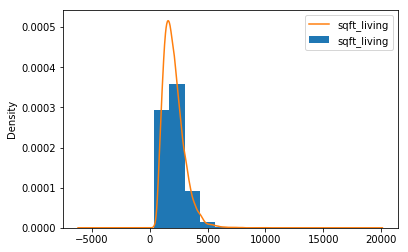

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


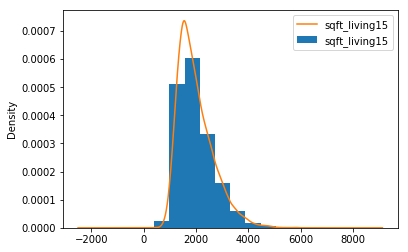

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


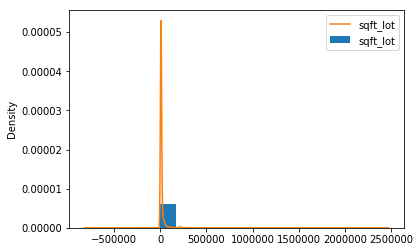

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


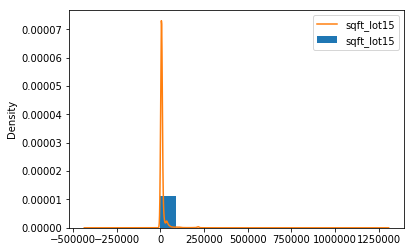

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


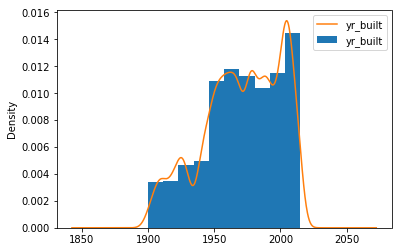

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


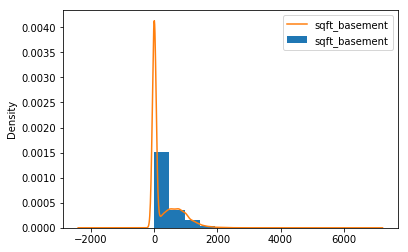

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


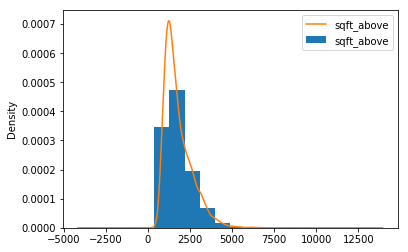

In [63]:
#Normalized hists of numerical variables
#--------------------------------------------------------------------------------------------------
for column in ['sqft_living',
       'sqft_living15', 'sqft_lot', 'sqft_lot15','yr_built','sqft_basement','sqft_above']:
    df[column].plot.hist(normed=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()


C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


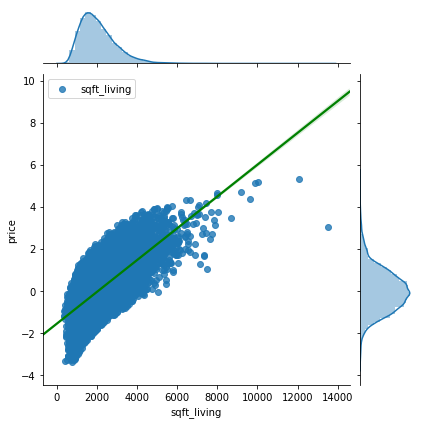

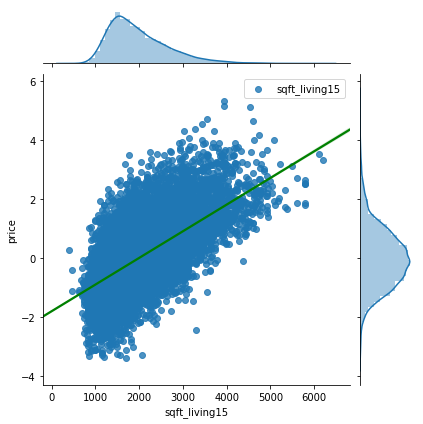

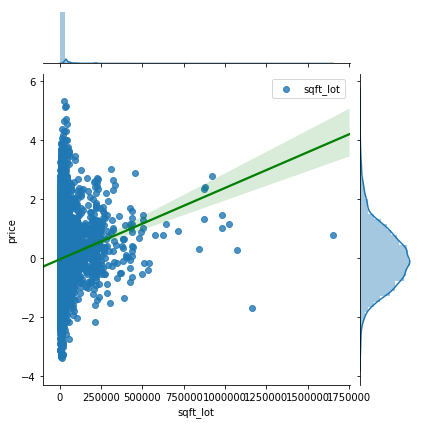

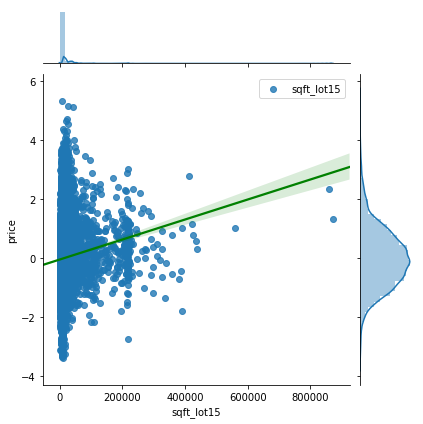

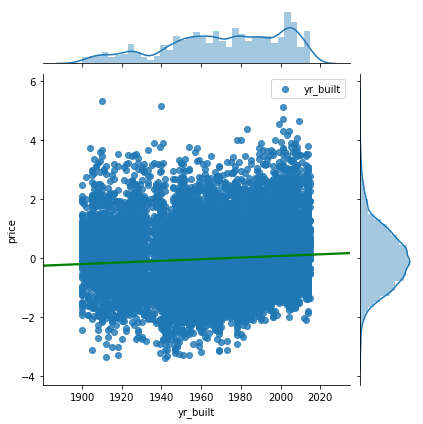

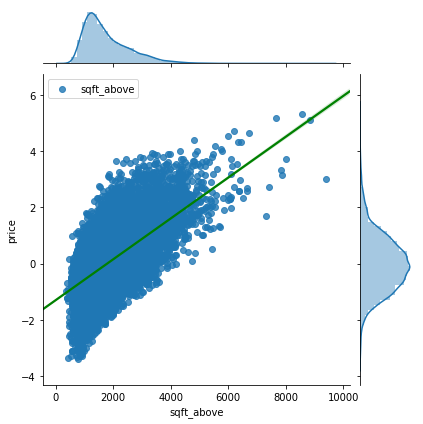

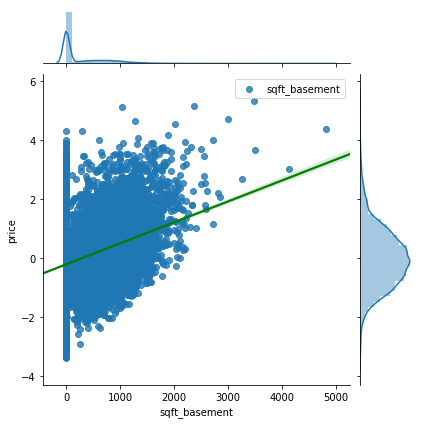

In [64]:
#Joint Plots
#----------------------------------------------------------------------------------------------------------
for column in ['sqft_living',
       'sqft_living15', 'sqft_lot', 'sqft_lot15','yr_built','sqft_above', 'sqft_basement']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()


Out of our four higly correlated variables sqft living seems to have the least ouliers and the closest distribution to normal, lets pick this one and drop the other two. We still need to address skewness and kurtosis for the rest of the numerical variables we are concerving. Also the sqft_lot variables show heteroskedasticity and the basement variable has too many 0 values but we will still try to retain it after log converting. The yr_built probably needs to be a time serie but we can address it that way another day.

In [65]:
#creating a data frame of log transformed variables 
data_log = pd.DataFrame([])
data_log["log_sqft_living"] = np.log(df["sqft_living"])
data_log["log_sqft_lot"] = np.log(df["sqft_lot"])
data_log["log_sqft_lot15"] = np.log(df["sqft_lot15"])
#data_log['sqft_basement']=df['sqft_basement']
#missing log transformation on basement


#using simpler appelation
sqftlot=data_log["log_sqft_lot"]
sqftliving=data_log["log_sqft_living"]
sqftlot15=data_log["log_sqft_lot15"]
#sqftbsmt=data_log["sqft_basement"]


#Scaling
scaled_sqftliving = (sqftliving - sqftliving.mean()) / sqftliving.std()
scaled_sqftlot = (sqftlot - sqftlot.mean()) / sqftlot.std()
scaled_sqftlot15 = (sqftlot15 - sqftlot15.mean()) / sqftlot15.std()
#scaled_sqftbasement = (sqftbsmt - sqftbsmt.mean()) / sqftbsmt.std()


#combining them in a dataframe to run a last check before modelling
df_check=pd.concat([df.price,scaled_sqftliving,scaled_sqftlot,scaled_sqftlot15],axis=1)

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


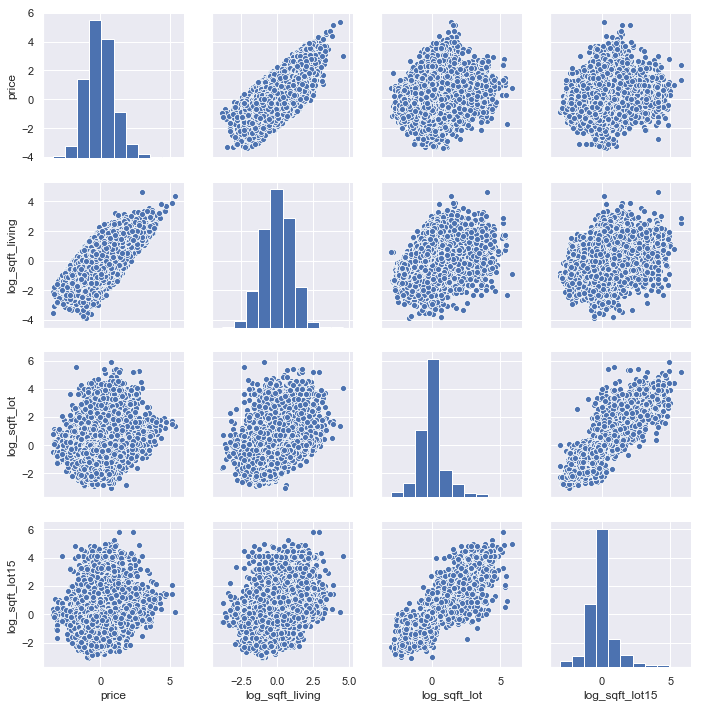

In [69]:
#scatterplot
sns.set()
cols = ['price', 'log_sqft_living', 'log_sqft_lot', 'log_sqft_lot15']
sns.pairplot(df_check[cols], size = 2.5)
plt.show();

And the winners are scaled square footage of living area and squarefootage of the basement the and year built. Size of living area is the strongest numerical predictor. Size and existence of basement does show a linear relationship to price despites the existence of many zero values. 
sqft_above and sqft_living15 were eliminated due to the results of correlations matrix and multicolinearity.
Sizes of lots seem to be showing heteroskedasticit with diamond shape scatterplots aginst price.
We have no grounds to disqualify the year the properties were built so far just as we have nothing showing we should be retaining it. We will include it for now and leave yhe final descision to stepwise selection.

In [70]:
#Updating what used to be a temporary with normalized and scaled DataFrame of Numerical predictors
#df_numerical=pd.concat([scaled_sqftliving, scaled_sqftlot,scaled_sqftlot15,df.yr_built,scaled_sqftbasement], axis=1)
df_numerical=pd.concat([scaled_sqftliving,df.sqft_basement,df.yr_built], axis=1)


# Modelling

In [71]:
#initial Model
#-----------------------------------------------------------------------------
df_ols = pd.concat([df_categorical,df_numerical], axis= 1)
df_ols.head(3)

X=df_ols
y=df.price
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1054.
Date:                Sun, 08 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:27:18   Log-Likelihood:                -9734.8
No. Observations:               21533   AIC:                         1.971e+04
Df Residuals:                   21412   BIC:                         2.068e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.1278      0.666     15.204      0.000       8.822      11.433
zip_98001          -2.4138      0.059    -40.906      0.000      -2.529      -2.298
zip_98002          -2.4712      0.062    -40.022      0.000      -2.592      -2.350
zip_98003          -2.3950      0.060    -39.983      0.000      -2.512      -2.278
zip_98004          -0.3198      0.059     -5.416      0.000      -0.436      -0.204
zip_98005          -1.0556      0.063    -16.879      0.000      -1.178      -0.933
zip_98006          -1.1703      0.058    -20.291      0.000      -1.283      -1.057
zip_98007          -1.2158      0.064    -19.004      0.000      -1.341      -1.090
zip_98008          -1.1370      0.060    -19.016      0.000      -1.254      -1.020
zip_98010          -1.8693      0.067    -27.779      0.000      -2.001      -1.737
zip_98011          -1.5980      0.062    -25.875      0.000      -1.719      -1.477
zip_98014          -1.7705      0.065    -27.171      0.000      -1.898      -1.643
zip_98019          -1.7791      0.062    -28.686      0.000      -1.901      -1.658
zip_98022          -2.1769      0.061    -35.777      0.000      -2.296      -2.058
zip_98023          -2.4829      0.058    -42.826      0.000      -2.597      -2.369
zip_98024          -1.5101      0.070    -21.598      0.000      -1.647      -1.373
zip_98027          -1.4467      0.058    -24.770      0.000      -1.561      -1.332
zip_98028          -1.6434      0.060    -27.459      0.000      -1.761      -1.526
zip_98029          -1.3490      0.059    -22.727      0.000      -1.465      -1.233
zip_98030          -2.3305      0.060    -38.598      0.000      -2.449      -2.212
zip_98031          -2.2777      0.060    -37.910      0.000      -2.396      -2.160
zip_98032          -2.4888      0.065    -38.190      0.000      -2.617      -2.361
zip_98033          -0.9412      0.058    -16.175      0.000      -1.055      -0.827
zip_98034          -1.3979      0.058    -24.210      0.000      -1.511      -1.285
zip_98038          -2.0731      0.058    -35.909      0.000      -2.186      -1.960
zip_98040          -0.6856      0.060    -11.492      0.000      -0.803      -0.569
zip_98042          -2.2570      0.058    -39.028      0.000      -2.370      -2.144
zip_98045          -1.7492      0.061    -28.653      0.000      -1.869      -1.630
zip_98052          -1.2450      0.058    -21.631      0.000      -1.358      -1.132
zip_98053          -1.2906      0.059    -22.035      0.000      -1.405      -1.176
zip_98055          -2.1911      0.060    -36.443      0.000      -2.309      -2.073
zip_98056          -1.7955      0.059    -30.647      0.000      -1.910      -1.681
zip_98058          -2.1140      0.058    -36.332      0.000      -2.228      -2.000
zip_98059          -1.7618      0.058    -30.335      0.000

In [72]:
#Predictors selection:
#-------------------------------------------------------------------------------
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [73]:
#brushing up the predictors with stepwise selection (only run this step if you can wait around 20mins)
#-----------------------------------------------------------------------------------------------
result = stepwise_selection(X, df["price"], verbose = True)
print('resulting features:')
print(result)


Add  log_sqft_living                with p-value 0.0
Add  yr_built                       with p-value 7.68245e-243
Add  zip_98004                      with p-value 2.30108e-223
Add  grade_7                        with p-value 1.81139e-203
Add  grade_6                        with p-value 0.0
Add  grade_8                        with p-value 2.69121e-266
Add  grade_5                        with p-value 0.0
Add  zip_98023                      with p-value 1.90948e-226
Add  grade_9                        with p-value 4.98086e-157
Add  zip_98001                      with p-value 3.30957e-129
Add  zip_98042                      with p-value 1.09987e-132
Add  zip_98092                      with p-value 9.79029e-141
Add  zip_98003                      with p-value 2.2045e-146
Add  zip_98058                      with p-value 1.60928e-115
Add  zip_98168                      with p-value 4.99118e-117
Add  zip_98030                      with p-value 1.50411e-114
Add  zip_98031                      

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop zip_98116                      with p-value 0.167578
Add  zip_98007                      with p-value 2.22844e-07
Drop zip_98122                      with p-value 0.727162
Add  zip_98136                      with p-value 3.93304e-06
Drop zip_98117                      with p-value 0.26967
Add  zip_98008                      with p-value 2.60946e-09
Drop zip_98103                      with p-value 0.932972
Add  bath_4.25                      with p-value 1.02752e-05
Drop zip_98115                      with p-value 0.425427
Add  bed_4                          with p-value 1.174e-05
Add  bath_3.75                      with p-value 1.13946e-05
Add  bath_2.75                      with p-value 1.72081e-05
Add  bath_4.75                      with p-value 6.39359e-05
Add  bath_3.5                       with p-value 6.19263e-05
Add  bath_4.0                       with p-value 9.69476e-05
Add  bed_5                          with p-value 6.57722e-05
Add  bath_4.5                       with p

In [75]:
#Generating dataframe of new predictors
#-----------------------------------------------------------------------------------------------
X=df_ols
[result[0]]
for i in range(1,len(result)):
    b=df_ols[result[i]]
    X=pd.concat([X,b], axis=1)


In [76]:
#Rerunning the model
#-----------------------------------------------------------------------------------------------
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1054.
Date:                Sun, 08 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:13:05   Log-Likelihood:                -9734.8
No. Observations:               21533   AIC:                         1.971e+04
Df Residuals:                   21412   BIC:                         2.068e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.1278      0.666     15.204      0.000       8.822      11.433
zip_98001          -1.2069      0.030    -40.906      0.000      -1.265      -1.149
zip_98002          -1.2356      0.031    -40.022      0.000      -1.296      -1.175
zip_98003          -1.1975      0.030    -39.983      0.000      -1.256      -1.139
zip_98004          -0.1599      0.030     -5.416      0.000      -0.218      -0.102
zip_98005          -0.5278      0.031    -16.879      0.000      -0.589      -0.467
zip_98006          -0.5852      0.029    -20.291      0.000      -0.642      -0.529
zip_98007          -0.6079      0.032    -19.004      0.000      -0.671      -0.545
zip_98008          -0.5685      0.030    -19.016      0.000      -0.627      -0.510
zip_98010          -0.9347      0.034    -27.779      0.000      -1.001      -0.869
zip_98011          -0.7990      0.031    -25.875      0.000      -0.860      -0.738
zip_98014          -0.8853      0.033    -27.171      0.000      -0.949      -0.821
zip_98019          -0.8896      0.031    -28.686      0.000      -0.950      -0.829
zip_98022          -1.0884      0.030    -35.777      0.000      -1.148      -1.029
zip_98023          -1.2414      0.029    -42.826      0.000      -1.298      -1.185
zip_98024          -0.7550      0.035    -21.598      0.000      -0.824      -0.687
zip_98027          -0.7233      0.029    -24.770      0.000      -0.781      -0.666
zip_98028          -0.8217      0.030    -27.459      0.000      -0.880      -0.763
zip_98029          -0.6745      0.030    -22.727      0.000      -0.733      -0.616
zip_98030          -1.1652      0.030    -38.598      0.000      -1.224      -1.106
zip_98031          -1.1389      0.030    -37.910      0.000      -1.198      -1.080
zip_98032          -1.2444      0.033    -38.190      0.000      -1.308      -1.181
zip_98033          -0.4706      0.029    -16.175      0.000      -0.528      -0.414
zip_98034          -0.6989      0.029    -24.210      0.000      -0.756      -0.642
zip_98038          -1.0366      0.029    -35.909      0.000      -1.093      -0.980
zip_98040          -0.3428      0.030    -11.492      0.000      -0.401      -0.284
zip_98042          -1.1285      0.029    -39.028      0.000      -1.185      -1.072
zip_98045          -0.8746      0.031    -28.653      0.000      -0.934      -0.815
zip_98052          -0.6225      0.029    -21.631      0.000      -0.679      -0.566
zip_98053          -0.6453      0.029    -22.035      0.000      -0.703      -0.588
zip_98055          -1.0955      0.030    -36.443      0.000      -1.154      -1.037
zip_98056          -0.8978      0.029    -30.647      0.000      -0.955      -0.840
zip_98058          -1.0570      0.029    -36.332      0.000      -1.114      -1.000
zip_98059          -0.8809      0.029    -30.335      0.000

# Conclusion

-Our final model has a high R Squared indicating that in theroy the model explains over 85% of the variability of properties prices' but our mean error is still high when applying the model to a test data set: around $500k which is higher than the mean price of the properties in the data set. 

-The three factors that affect price the most are location as expected, but also the grade and size which both show high positive correlation with price.

-Surprinsgly the year a house is built or renovated does not seem to impact price significantly for properties in the King County area

-We used size of basement as a predicor without eliminating the positive skewness which violates partially the prerequisits for model validity, more time would have been necessary to clean the data even more and eventually optimize the model.

-One of the most surprising results is the strong effect of the number of bathrooms on price. With more time I would be curious to add a column to the data that would show a ratio of bathrooms to bedrooms since this is a factor home owners can control by adding bathrooms to increase the value of their home. We would be looking for an optiomal ratio there.

-One of the most popular driver of house prices is known to be time, thus the interest in real estate investment. Unfortunately we have not been able to put this relationship under the spot light during this project because the data was only comprised of transactions that occured within a one year time period which is not long enough to exhibit the trend. Having a data set with a longer time period can be key to identifying a major value driver and help actors like Real Estate Investment companies decide when to add proeprties to their portfolios and when to sell.  




